![nba-logo](images/nba-logo.png)

**Una empresa dedicada a las apuestas, necesita un modelo de entrenamiento fiable en el cual poder saber si gana un equipo u otro dependiendo de unos datos de entrada. En este ejercicio se haran pruebas de distintos modelos y se seleccionaran distintas variables para probar su eficacia.**

In [1]:
import pandas as pd 
import numpy as np
from IPython.display import display
import zipfile as zp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as prep
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

Ejecutamos un script para descargar los csv de kaggle

In [2]:
%run -i download_df.py

Autenticando con la API de kaggle...
Descargado el dataframe en la carpeta dataframes


Carga de los dataframes

In [3]:
df_games = pd.read_csv('dataframes/games.csv')
df_games_details = pd.read_csv('dataframes/games_details.csv', low_memory=False)
df_players = pd.read_csv('dataframes/players.csv')
df_ranking = pd.read_csv('dataframes/ranking.csv')
df_teams = pd.read_csv('dataframes/teams.csv')

Muestra varias filas de cada dataframe para realizar un primer analisis

In [4]:
print("--------- PARTIDOS ----------")
print("-----------------------------")
display(df_games.head())
print("--------- DETALLES PARTIDOS ----------")
print("--------------------------------------")
display(df_games_details.head())
print("--------- JUGADORES ----------")
print("------------------------------")
display(df_players.head())
print("--------- RANKING LIGA ----------")
print("---------------------------------")
display(df_ranking.head())
print("--------- EQUIPOS ----------")
print("----------------------------")
display(df_teams.head())

--------- PARTIDOS ----------
-----------------------------


,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,1610612740,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,1610612762,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,1610612739,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,1610612755,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,1610612737,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


--------- DETALLES PARTIDOS ----------
--------------------------------------


,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


--------- JUGADORES ----------
------------------------------


,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
0,Royce O'Neale,1610612762,1626220,2019
1,Bojan Bogdanovic,1610612762,202711,2019
2,Rudy Gobert,1610612762,203497,2019
3,Donovan Mitchell,1610612762,1628378,2019
4,Mike Conley,1610612762,201144,2019


--------- RANKING LIGA ----------
---------------------------------


,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN


--------- EQUIPOS ----------
----------------------------


,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


Muestra filas y columnas de cada dataframe

In [5]:
print("--------- PARTIDOS ----------")
print("-----------------------------")
display(df_games.shape)
print("--------- DETALLES PARTIDOS ----------")
print("--------------------------------------")
display(df_games_details.shape)
print("--------- JUGADORES ----------")
print("------------------------------")
display(df_players.shape)
print("--------- RANKING LIGA ----------")
print("---------------------------------")
display(df_ranking.shape)
print("--------- EQUIPOS ----------")
print("----------------------------")
display(df_teams.shape)

--------- PARTIDOS ----------
-----------------------------


(26651, 21)

--------- DETALLES PARTIDOS ----------
--------------------------------------


(668628, 29)

--------- JUGADORES ----------
------------------------------


(7228, 4)

--------- RANKING LIGA ----------
---------------------------------


(210342, 13)

--------- EQUIPOS ----------
----------------------------


(30, 14)

Vemos la información

In [6]:
print("--------- PARTIDOS ----------")
print("-----------------------------")
display(df_games.dtypes)
print("--------- DETALLES PARTIDOS ----------")
print("--------------------------------------")
display(df_games_details.dtypes)
print("--------- JUGADORES ----------")
print("------------------------------")
display(df_players.dtypes)
print("--------- RANKING LIGA ----------")
print("---------------------------------")
display(df_ranking.dtypes)
print("--------- EQUIPOS ----------")
print("----------------------------")
display(df_teams.dtypes)

--------- PARTIDOS ----------
-----------------------------


GAME_DATE_EST        object
GAME_ID               int64
GAME_STATUS_TEXT     object
HOME_TEAM_ID          int64
VISITOR_TEAM_ID       int64
SEASON                int64
TEAM_ID_home          int64
PTS_home            float64
FG_PCT_home         float64
FT_PCT_home         float64
FG3_PCT_home        float64
AST_home            float64
REB_home            float64
TEAM_ID_away          int64
PTS_away            float64
FG_PCT_away         float64
FT_PCT_away         float64
FG3_PCT_away        float64
AST_away            float64
REB_away            float64
HOME_TEAM_WINS        int64
dtype: object

--------- DETALLES PARTIDOS ----------
--------------------------------------


GAME_ID                int64
TEAM_ID                int64
TEAM_ABBREVIATION     object
TEAM_CITY             object
PLAYER_ID              int64
PLAYER_NAME           object
NICKNAME              object
START_POSITION        object
COMMENT               object
MIN                   object
FGM                  float64
FGA                  float64
FG_PCT               float64
FG3M                 float64
FG3A                 float64
FG3_PCT              float64
FTM                  float64
FTA                  float64
FT_PCT               float64
OREB                 float64
DREB                 float64
REB                  float64
AST                  float64
STL                  float64
BLK                  float64
TO                   float64
PF                   float64
PTS                  float64
PLUS_MINUS           float64
dtype: object

--------- JUGADORES ----------
------------------------------


PLAYER_NAME    object
TEAM_ID         int64
PLAYER_ID       int64
SEASON          int64
dtype: object

--------- RANKING LIGA ----------
---------------------------------


TEAM_ID            int64
LEAGUE_ID          int64
SEASON_ID          int64
STANDINGSDATE     object
CONFERENCE        object
TEAM              object
G                  int64
W                  int64
L                  int64
W_PCT            float64
HOME_RECORD       object
ROAD_RECORD       object
RETURNTOPLAY     float64
dtype: object

--------- EQUIPOS ----------
----------------------------


LEAGUE_ID               int64
TEAM_ID                 int64
MIN_YEAR                int64
MAX_YEAR                int64
ABBREVIATION           object
NICKNAME               object
YEARFOUNDED             int64
CITY                   object
ARENA                  object
ARENACAPACITY         float64
OWNER                  object
GENERALMANAGER         object
HEADCOACH              object
DLEAGUEAFFILIATION     object
dtype: object

Ver si hay nulos en los distintos dataframes

In [7]:
print("--------- PARTIDOS ----------")
print("-----------------------------")
display(df_games.isnull().sum())
display(df_games[df_games.isna().any(axis=1)])

--------- PARTIDOS ----------
-----------------------------


GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
19175,2003-10-24,10300116,Final,1610612753,1610612762,2003,1610612753,NaN,NaN,NaN,...,NaN,NaN,1610612762,NaN,NaN,NaN,NaN,NaN,NaN,0
19176,2003-10-24,10300108,Final,1610612737,1610612764,2003,1610612737,NaN,NaN,NaN,...,NaN,NaN,1610612764,NaN,NaN,NaN,NaN,NaN,NaN,0
19177,2003-10-24,10300109,Final,1610612738,1610612751,2003,1610612738,NaN,NaN,NaN,...,NaN,NaN,1610612751,NaN,NaN,NaN,NaN,NaN,NaN,0
19178,2003-10-24,10300113,Final,1610612759,1610612745,2003,1610612759,NaN,NaN,NaN,...,NaN,NaN,1610612745,NaN,NaN,NaN,NaN,NaN,NaN,0
19179,2003-10-24,10300112,Final,1610612749,1610612765,2003,1610612749,NaN,NaN,NaN,...,NaN,NaN,1610612765,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19269,2003-10-09,10300019,Final,1610612743,1610612756,2003,1610612743,NaN,NaN,NaN,...,NaN,NaN,1610612756,NaN,NaN,NaN,NaN,NaN,NaN,0
19270,2003-10-09,10300022,Final,1610612757,1610612758,2003,1610612757,NaN,NaN,NaN,...,NaN,NaN,1610612758,NaN,NaN,NaN,NaN,NaN,NaN,0
19271,2003-10-08,10300013,Final,1610612759,1610612763,2003,1610612759,NaN,NaN,NaN,...,NaN,NaN,1610612763,NaN,NaN,NaN,NaN,NaN,NaN,0
19278,2003-10-08,10300015,Final,1610612747,1610612744,2003,1610612747,NaN,NaN,NaN,...,NaN,NaN,1610612744,NaN,NaN,NaN,NaN,NaN,NaN,0


In [8]:
print("--------- DETALLES PARTIDOS ----------")
print("--------------------------------------")
display(df_games_details.isnull().sum())
display(df_games_details[df_games_details.isna().any(axis=1)])

--------- DETALLES PARTIDOS ----------
--------------------------------------


GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       412863
COMMENT              558939
MIN                  109690
FGM                  109690
FGA                  109690
FG_PCT               109690
FG3M                 109690
FG3A                 109690
FG3_PCT              109690
FTM                  109690
FTA                  109690
FT_PCT               109690
OREB                 109690
DREB                 109690
REB                  109690
AST                  109690
STL                  109690
BLK                  109690
TO                   109690
PF                   109690
PTS                  109690
PLUS_MINUS           133351
dtype: int64

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


In [9]:
print("--------- JUGADORES ----------")
print("------------------------------")
display(df_players.isnull().sum())
display(df_players[df_players.isna().any(axis=1)])

--------- JUGADORES ----------
------------------------------


PLAYER_NAME    0
TEAM_ID        0
PLAYER_ID      0
SEASON         0
dtype: int64

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON


In [10]:
print("--------- RANKING LIGA ----------")
print("---------------------------------")
display(df_ranking.isnull().sum())
display(df_ranking[df_ranking.isna().any(axis=1)])

--------- RANKING LIGA ----------
---------------------------------


TEAM_ID               0
LEAGUE_ID             0
SEASON_ID             0
STANDINGSDATE         0
CONFERENCE            0
TEAM                  0
G                     0
W                     0
L                     0
W_PCT                 0
HOME_RECORD           0
ROAD_RECORD           0
RETURNTOPLAY     206352
dtype: int64

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612743,0,22022,2022-12-22,West,Denver,30,19,11,0.633,10-3,9-8,NaN
1,1610612763,0,22022,2022-12-22,West,Memphis,30,19,11,0.633,13-2,6-9,NaN
2,1610612740,0,22022,2022-12-22,West,New Orleans,31,19,12,0.613,13-4,6-8,NaN
3,1610612756,0,22022,2022-12-22,West,Phoenix,32,19,13,0.594,14-4,5-9,NaN
4,1610612746,0,22022,2022-12-22,West,LA Clippers,33,19,14,0.576,11-7,8-7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210337,1610612765,0,22013,2014-09-01,East,Detroit,82,29,53,0.354,17-24,12-29,NaN
210338,1610612738,0,22013,2014-09-01,East,Boston,82,25,57,0.305,16-25,9-32,NaN
210339,1610612753,0,22013,2014-09-01,East,Orlando,82,23,59,0.280,19-22,4-37,NaN
210340,1610612755,0,22013,2014-09-01,East,Philadelphia,82,19,63,0.232,10-31,9-32,NaN


In [11]:
print("--------- EQUIPOS ----------")
print("----------------------------")
display(df_teams.isnull().sum())
display(df_teams[df_teams.isna().any(axis=1)])

--------- EQUIPOS ----------
----------------------------


LEAGUE_ID             0
TEAM_ID               0
MIN_YEAR              0
MAX_YEAR              0
ABBREVIATION          0
NICKNAME              0
YEARFOUNDED           0
CITY                  0
ARENA                 0
ARENACAPACITY         4
OWNER                 0
GENERALMANAGER        0
HEADCOACH             0
DLEAGUEAFFILIATION    0
dtype: int64

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
12,0,1610612751,1976,2019,BKN,Nets,1976,Brooklyn,Barclays Center,NaN,Joe Tsai,Sean Marks,Kenny Atkinson,Long Island Nets
16,0,1610612755,1949,2019,PHI,76ers,1949,Philadelphia,Wells Fargo Center,NaN,Joshua Harris,Elton Brand,Brett Brown,Delaware Blue Coats
17,0,1610612756,1968,2019,PHX,Suns,1968,Phoenix,Talking Stick Resort Arena,NaN,Robert Sarver,James Jones,Monty Williams,Northern Arizona Suns


En el df de partidos podemos ver que hay NaN en el 2003, borramos todas las filas con partidos anteriores al 2010 y comprobamos si se han quedado NaN

<AxesSubplot: >

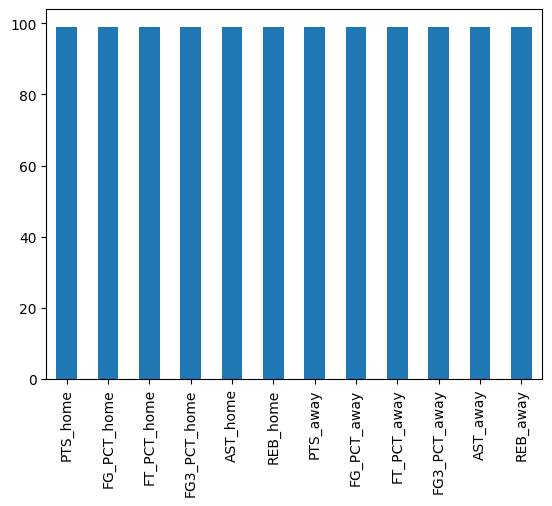

In [12]:
df_games.isna().sum()[df_games.isna().sum()>0].plot(kind='bar')

In [13]:
df_games = df_games.loc[df_games['GAME_DATE_EST'] >= "2004-01-01"].reset_index(drop=True)

In [14]:
df_games.isnull().sum()

GAME_DATE_EST       0
GAME_ID             0
GAME_STATUS_TEXT    0
HOME_TEAM_ID        0
VISITOR_TEAM_ID     0
SEASON              0
TEAM_ID_home        0
PTS_home            0
FG_PCT_home         0
FT_PCT_home         0
FG3_PCT_home        0
AST_home            0
REB_home            0
TEAM_ID_away        0
PTS_away            0
FG_PCT_away         0
FT_PCT_away         0
FG3_PCT_away        0
AST_away            0
REB_away            0
HOME_TEAM_WINS      0
dtype: int64

Para saber que equipo es, podríamos fusionar algunos datos del dataframe de partidos con el de equipos de alguna manera

In [15]:
display(df_games.columns)
display(df_teams.columns)

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

Index(['LEAGUE_ID', 'TEAM_ID', 'MIN_YEAR', 'MAX_YEAR', 'ABBREVIATION',
       'NICKNAME', 'YEARFOUNDED', 'CITY', 'ARENA', 'ARENACAPACITY', 'OWNER',
       'GENERALMANAGER', 'HEADCOACH', 'DLEAGUEAFFILIATION'],
      dtype='object')

Vemos como podemos sustituir los IDS por los nombres de los equipos

In [16]:
df_teams = df_teams[['TEAM_ID', 'NICKNAME']]

# Reemplaza HOME_TEAM_ID por los nombres del dataframe teams
nombres_local = df_teams.copy()
nombres_local.columns = ['HOME_TEAM_ID', 'NICKNAME']
# Se unen el ID de lequipo por el nickname
result_1 = pd.merge(df_games['HOME_TEAM_ID'], nombres_local, how ="left", on="HOME_TEAM_ID")  
df_games['HOME_TEAM_ID'] = result_1['NICKNAME']


Vemos como se ha cambiado el HOME_TEAM_ID por el nombre del equipo, haremos lo mismo con el visitante

In [17]:
df_games.head(20)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,Pelicans,1610612759,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,Jazz,1610612764,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,Cavaliers,1610612749,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,76ers,1610612765,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,Hawks,1610612741,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0
5,2022-12-21,22200469,Final,Celtics,1610612754,2022,1610612738,112.0,0.386,0.840,...,26.0,62.0,1610612754,117.0,0.469,0.778,0.462,27.0,47.0,0
6,2022-12-21,22200470,Final,Nets,1610612744,2022,1610612751,143.0,0.643,0.875,...,42.0,32.0,1610612744,113.0,0.494,0.760,0.364,32.0,36.0,1
7,2022-12-21,22200471,Final,Knicks,1610612761,2022,1610612752,106.0,0.553,0.611,...,25.0,38.0,1610612761,113.0,0.447,0.909,0.265,17.0,38.0,0
8,2022-12-21,22200472,Final,Rockets,1610612753,2022,1610612745,110.0,0.466,0.647,...,22.0,49.0,1610612753,116.0,0.451,0.697,0.297,19.0,45.0,0
9,2022-12-21,22200473,Final,Timberwolves,1610612742,2022,1610612750,99.0,0.494,0.700,...,23.0,39.0,1610612742,104.0,0.453,0.852,0.333,17.0,39.0,0


Haremos lo mismo con los equipos visitantes

In [18]:
# Reemplaza VISITOR_TEAM_ID por los nombres del dataframe teams
nombres_visitante = df_teams.copy()
nombres_visitante.columns = ['VISITOR_TEAM_ID', 'NICKNAME']
# Se unen el ID del equipo por el nickname
result_2 = pd.merge(df_games['VISITOR_TEAM_ID'], nombres_visitante, how ="left", on="VISITOR_TEAM_ID")  
df_games['VISITOR_TEAM_ID'] = result_2['NICKNAME']

In [19]:
df_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Final,Pelicans,Spurs,2022,1610612740,126.0,0.484,0.926,...,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Final,Jazz,Wizards,2022,1610612762,120.0,0.488,0.952,...,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Final,Cavaliers,Bucks,2022,1610612739,114.0,0.482,0.786,...,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,Final,76ers,Pistons,2022,1610612755,113.0,0.441,0.909,...,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Final,Hawks,Bulls,2022,1610612737,108.0,0.429,1.000,...,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


Exploración de los valores únicos de las variables del dataframe de partidos

In [20]:

for column in df_games.columns:
    if len(df_games[column].unique()) < 10:
        print(column, df_games[column].unique())
    else:
        continue

GAME_STATUS_TEXT ['Final']
HOME_TEAM_WINS [1 0]


Al menos GAME_STATUS_TEXT nos sobra ya que solo tiene un valor unico y no tiene relevancia

In [21]:
df_games = df_games.drop(columns=['GAME_STATUS_TEXT'])
df_games.head()

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2022-12-22,22200477,Pelicans,Spurs,2022,1610612740,126.0,0.484,0.926,0.382,25.0,46.0,1610612759,117.0,0.478,0.815,0.321,23.0,44.0,1
1,2022-12-22,22200478,Jazz,Wizards,2022,1610612762,120.0,0.488,0.952,0.457,16.0,40.0,1610612764,112.0,0.561,0.765,0.333,20.0,37.0,1
2,2022-12-21,22200466,Cavaliers,Bucks,2022,1610612739,114.0,0.482,0.786,0.313,22.0,37.0,1610612749,106.0,0.470,0.682,0.433,20.0,46.0,1
3,2022-12-21,22200467,76ers,Pistons,2022,1610612755,113.0,0.441,0.909,0.297,27.0,49.0,1610612765,93.0,0.392,0.735,0.261,15.0,46.0,1
4,2022-12-21,22200468,Hawks,Bulls,2022,1610612737,108.0,0.429,1.000,0.378,22.0,47.0,1610612741,110.0,0.500,0.773,0.292,20.0,47.0,0


Selecciono solo la temporada 2022

In [22]:
df_games_2022 = df_games.loc[df_games['SEASON'] == 2022]

Vemos cantidad de filas y columnas del nuevo dataframe seleccionando 2022

In [23]:
df_games_2022.shape

(542, 20)

Guardamos las columnas en una variable llamada variables

In [24]:
variables = list(df_games_2022.columns)
print(variables)

['GAME_DATE_EST', 'GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away', 'HOME_TEAM_WINS']


Guardamos las variables numericas en una lista y luego creamos otra lista con las mismas variables pero añadiendo norm para saber que están normalizadas

In [25]:
variables_elegidas = ['FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away', 'REB_away']
variables_elegidas_norm = ['FG_PCT_home_norm', 'FT_PCT_home_norm', 'FG3_PCT_home_norm', 'AST_home_norm', 'REB_home_norm', 'FG_PCT_away_norm', 'FT_PCT_away_norm', 'FG3_PCT_away_norm', 'AST_away_norm', 'REB_away_norm']


Añadir al dataframe "X" las variables que hemos elegido para entrenar y al "y" el target, esto dirá si gana el equipo local 0 y si gana el visitante 1

In [26]:
X = df_games_2022[variables_elegidas]
y = df_games_2022["HOME_TEAM_WINS"]

Muestra el conjunto de datos de la temporada 2022 y el target

In [27]:
display(X.head())
display(y.head())

,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
0,0.484,0.926,0.382,25.0,46.0,0.478,0.815,0.321,23.0,44.0
1,0.488,0.952,0.457,16.0,40.0,0.561,0.765,0.333,20.0,37.0
2,0.482,0.786,0.313,22.0,37.0,0.470,0.682,0.433,20.0,46.0
3,0.441,0.909,0.297,27.0,49.0,0.392,0.735,0.261,15.0,46.0
4,0.429,1.000,0.378,22.0,47.0,0.500,0.773,0.292,20.0,47.0


0    1
1    1
2    1
3    1
4    0
Name: HOME_TEAM_WINS, dtype: int64

Hacemos el split de train y de test, 0.7 y 0.3 respectivamente

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, random_state=42)

Normalizamos las variables elegidas en train

In [29]:
scaler = prep.MinMaxScaler()
X = scaler.fit_transform(X_train[variables_elegidas])

# Creamos columnas con datos normalizados
X_train[variables_elegidas_norm] = X
# Borramos las variables no normalizadas
X_train = X_train.select_dtypes(include = 'number').drop(variables_elegidas, axis = 1)

In [30]:
X_train.head()

,FG_PCT_home_norm,FT_PCT_home_norm,FG3_PCT_home_norm,AST_home_norm,REB_home_norm,FG_PCT_away_norm,FT_PCT_away_norm,FG3_PCT_away_norm,AST_away_norm,REB_away_norm
440,0.390173,0.400,0.367010,0.08,0.441860,0.431611,0.881429,0.457471,0.629630,0.684211
247,0.095376,0.688,0.228866,0.04,0.581395,0.249240,0.682857,0.310345,0.481481,0.578947
434,0.410405,0.600,0.162887,0.48,0.372093,0.364742,0.735714,0.487356,0.259259,0.763158
57,0.580925,0.666,0.703093,0.56,0.511628,0.547112,0.841429,0.425287,0.666667,0.421053
234,0.861272,0.466,0.758763,0.76,0.488372,0.346505,0.354286,0.381609,0.592593,0.552632


Normalizamos test

In [31]:
X = scaler.transform(X_test[variables_elegidas])

# Creamos columnas con datos normalizados
X_test[variables_elegidas_norm] = X
# Borramos las variables no normalizadas
X_test = X_test.select_dtypes(include = 'number').drop(variables_elegidas, axis = 1)

Vemos cuales son las mejores 6 variables correlacionadas con y, también la correlación de todas

In [32]:
selector = SelectKBest(chi2, k=6)

X_select = selector.fit_transform(X_train, y_train)
print(selector.get_feature_names_out())
for var, value in zip(selector.feature_names_in_, selector.scores_):
    print('Variable %s: %.4f' % (var, value))

['FG_PCT_home_norm' 'FG3_PCT_home_norm' 'AST_home_norm' 'FG_PCT_away_norm'
 'FG3_PCT_away_norm' 'AST_away_norm']
Variable FG_PCT_home_norm: 3.7384
Variable FT_PCT_home_norm: 0.3319
Variable FG3_PCT_home_norm: 3.0046
Variable AST_home_norm: 3.0950
Variable REB_home_norm: 0.5436
Variable FG_PCT_away_norm: 3.8130
Variable FT_PCT_away_norm: 0.1706
Variable FG3_PCT_away_norm: 4.5008
Variable AST_away_norm: 2.6714
Variable REB_away_norm: 1.6384


APLICAMOS EL ENTRENAMIENTO DE MODELOS

Empezamos usando regresión logistíca

In [33]:
# Creamos el objeto del modelo con parámetros por defecto, fijando la semilla para evitar aleatoriedad
logreg = LogisticRegression(random_state=42)

# Entrenamos con el conjunto de train y su target
logreg.fit(X_train, y_train)
print('Accuracy en train: ', logreg.score(X_train, y_train))
print('Accuracy en test: ', logreg.score(X_test, y_test))

Accuracy en train:  0.8522427440633246
Accuracy en test:  0.8159509202453987


Usamos el algoritmo de maquinas de vector soporte de clasificación con una pipeline de scikit-learn

In [34]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7361963190184049

Probamos el accuracy de un randomforest

In [35]:
#Create a Gaussian Classifier
gc=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
gc.fit(X_train,y_train)

y_pred=gc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7852760736196319


Muestra la matriz de confusión, herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

<AxesSubplot: >

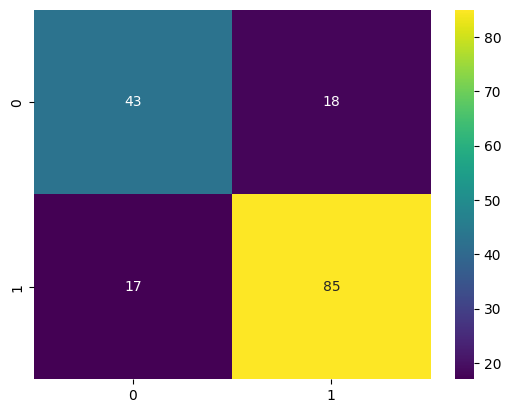

In [36]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')

Aplicamos la metrica de reporte de clasificación con el random forest

In [37]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71        61
           1       0.83      0.83      0.83       102

    accuracy                           0.79       163
   macro avg       0.77      0.77      0.77       163
weighted avg       0.78      0.79      0.78       163



Probamos el arbol de decision

In [38]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state = 42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7300613496932515


Vemos el reporte de clasificación en el arbol de decisión

In [39]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        61
           1       0.78      0.78      0.78       102

    accuracy                           0.73       163
   macro avg       0.71      0.71      0.71       163
weighted avg       0.73      0.73      0.73       163



Dibujamos el arbol de decisión con cajas y en formato texto

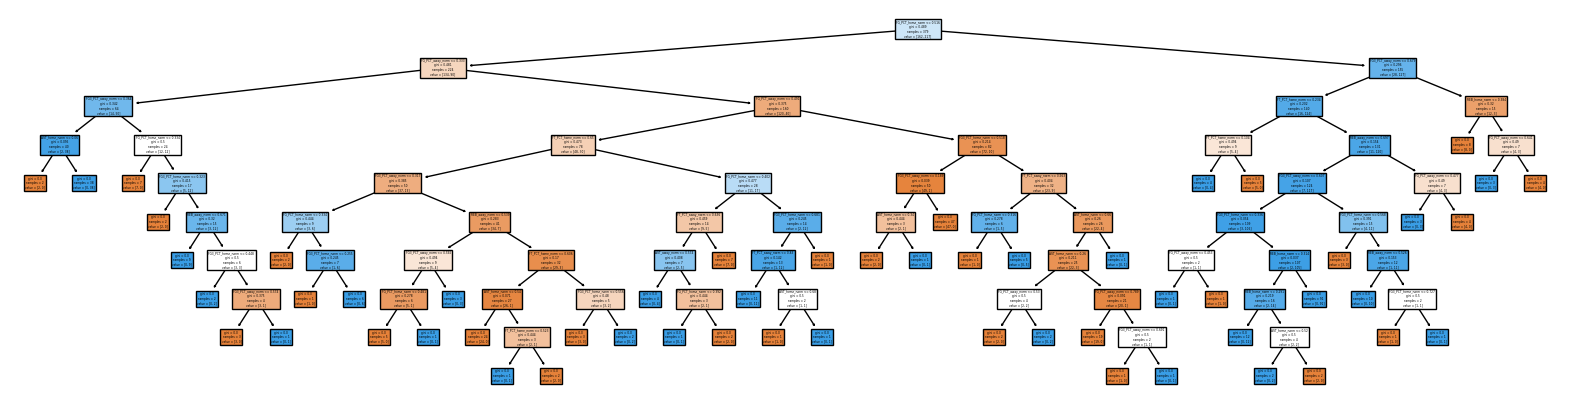

In [40]:
from sklearn.tree import plot_tree, export_text

fig = plt.figure(figsize=(20,5))
_ = plot_tree(clf, feature_names=clf.feature_names_in_, filled=True)

El arbol en modo texto

In [41]:
text_representation = export_text(clf, feature_names = list(clf.feature_names_in_))
print(text_representation)

|--- FG_PCT_home_norm <= 0.52
|   |--- FG_PCT_away_norm <= 0.33
|   |   |--- FG3_PCT_away_norm <= 0.36
|   |   |   |--- AST_home_norm <= 0.06
|   |   |   |   |--- class: 0
|   |   |   |--- AST_home_norm >  0.06
|   |   |   |   |--- class: 1
|   |   |--- FG3_PCT_away_norm >  0.36
|   |   |   |--- FG_PCT_home_norm <= 0.33
|   |   |   |   |--- class: 0
|   |   |   |--- FG_PCT_home_norm >  0.33
|   |   |   |   |--- FG3_PCT_home_norm <= 0.32
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- FG3_PCT_home_norm >  0.32
|   |   |   |   |   |--- REB_away_norm <= 0.67
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- REB_away_norm >  0.67
|   |   |   |   |   |   |--- FG3_PCT_home_norm <= 0.45
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- FG3_PCT_home_norm >  0.45
|   |   |   |   |   |   |   |--- FG3_PCT_away_norm <= 0.57
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- FG3_PCT_away_norm >  0.57
|   |   |   |   |   |   |   | 

Algoritmo de vecinos cercanos, KNN

In [42]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7300613496932515


Vemos el reporte de clasificación de KNN

In [44]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.61      0.63        61
           1       0.77      0.80      0.79       102

    accuracy                           0.73       163
   macro avg       0.71      0.71      0.71       163
weighted avg       0.73      0.73      0.73       163



Probamos Naive Beyes

In [45]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [46]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.803680981595092


Curva ROC

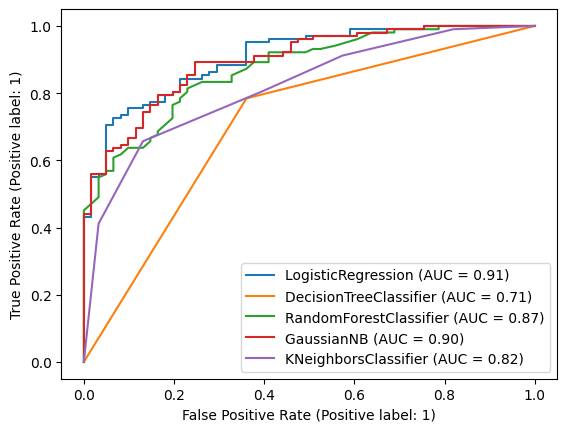

In [55]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(logreg, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gc, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(gnb, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(knn, X_test, y_test, ax=ax)

Vemos el reporte de clasificación de Naive Beyes

In [48]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        61
           1       0.87      0.80      0.84       102

    accuracy                           0.80       163
   macro avg       0.79      0.80      0.80       163
weighted avg       0.81      0.80      0.81       163



Ver el gridsearch de clasificación de todos los modelos

In [49]:
classifiers = {
    "Dummy"        : DummyClassifier(strategy='uniform'),
    "KNN(3)"       : KNeighborsClassifier(3), 
    "RBF SVM"      : SVC(gamma=2, C=1), 
    "Decision Tree": DecisionTreeClassifier(max_depth=7), 
    "Random Forest": RandomForestClassifier(max_depth=7, n_estimators=10, max_features=4), 
    "Neural Net"   : MLPClassifier(alpha=1), 
    "AdaBoost"     : AdaBoostClassifier(),
    "Naive Bayes"  : GaussianNB(), 
    "QDA"          : QuadraticDiscriminantAnalysis(),
    "Linear SVC"   : LinearSVC(),
    "Linear SVM"   : SVC(kernel="linear"), 
    "Gaussian Proc": GaussianProcessClassifier(1.0 * RBF(1.0)),
    "LogisticRegr" : LogisticRegression()
}

In [50]:
# Start timing the models above
from time import time
nfast = 14      # Don't run the very slow ones
head = list(classifiers.items())[:nfast]

for name, classifier in head:
    start = time()
    classifier.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test, y_test)
    score_time = time()-start
    print("{:<15}| score = {:.3f} | time = {:,.3f}s/{:,.3f}s".format(name, score, train_time, score_time))

Dummy          | score = 0.503 | time = 0.001s/0.000s
KNN(3)         | score = 0.742 | time = 0.001s/0.004s
RBF SVM        | score = 0.755 | time = 0.003s/0.003s
Decision Tree  | score = 0.730 | time = 0.002s/0.001s
Random Forest  | score = 0.736 | time = 0.011s/0.002s
Neural Net     | score = 0.810 | time = 0.154s/0.002s
AdaBoost       | score = 0.779 | time = 0.072s/0.007s
Naive Bayes    | score = 0.804 | time = 0.002s/0.001s
QDA            | score = 0.816 | time = 0.010s/0.001s
Linear SVC     | score = 0.804 | time = 0.003s/0.001s
Linear SVM     | score = 0.804 | time = 0.003s/0.002s
Gaussian Proc  | score = 0.798 | time = 1.687s/0.004s
LogisticRegr   | score = 0.816 | time = 0.006s/0.004s


UNA VEZ CONSEGUIDO UN ACCURANCY DECENTE, SEGUIMOS ANALIZANDO LOS DATASET

In [51]:
data_merge= pd.merge(left=df_ranking,right=df_teams,left_on="TEAM_ID",right_on="TEAM_ID")
wins= data_merge.groupby(by="NICKNAME").mean().round()
wins.sort_values("W",ascending=False,inplace=True)

Matriz de correlación

<AxesSubplot: title={'center': 'Matriz de correlación'}>

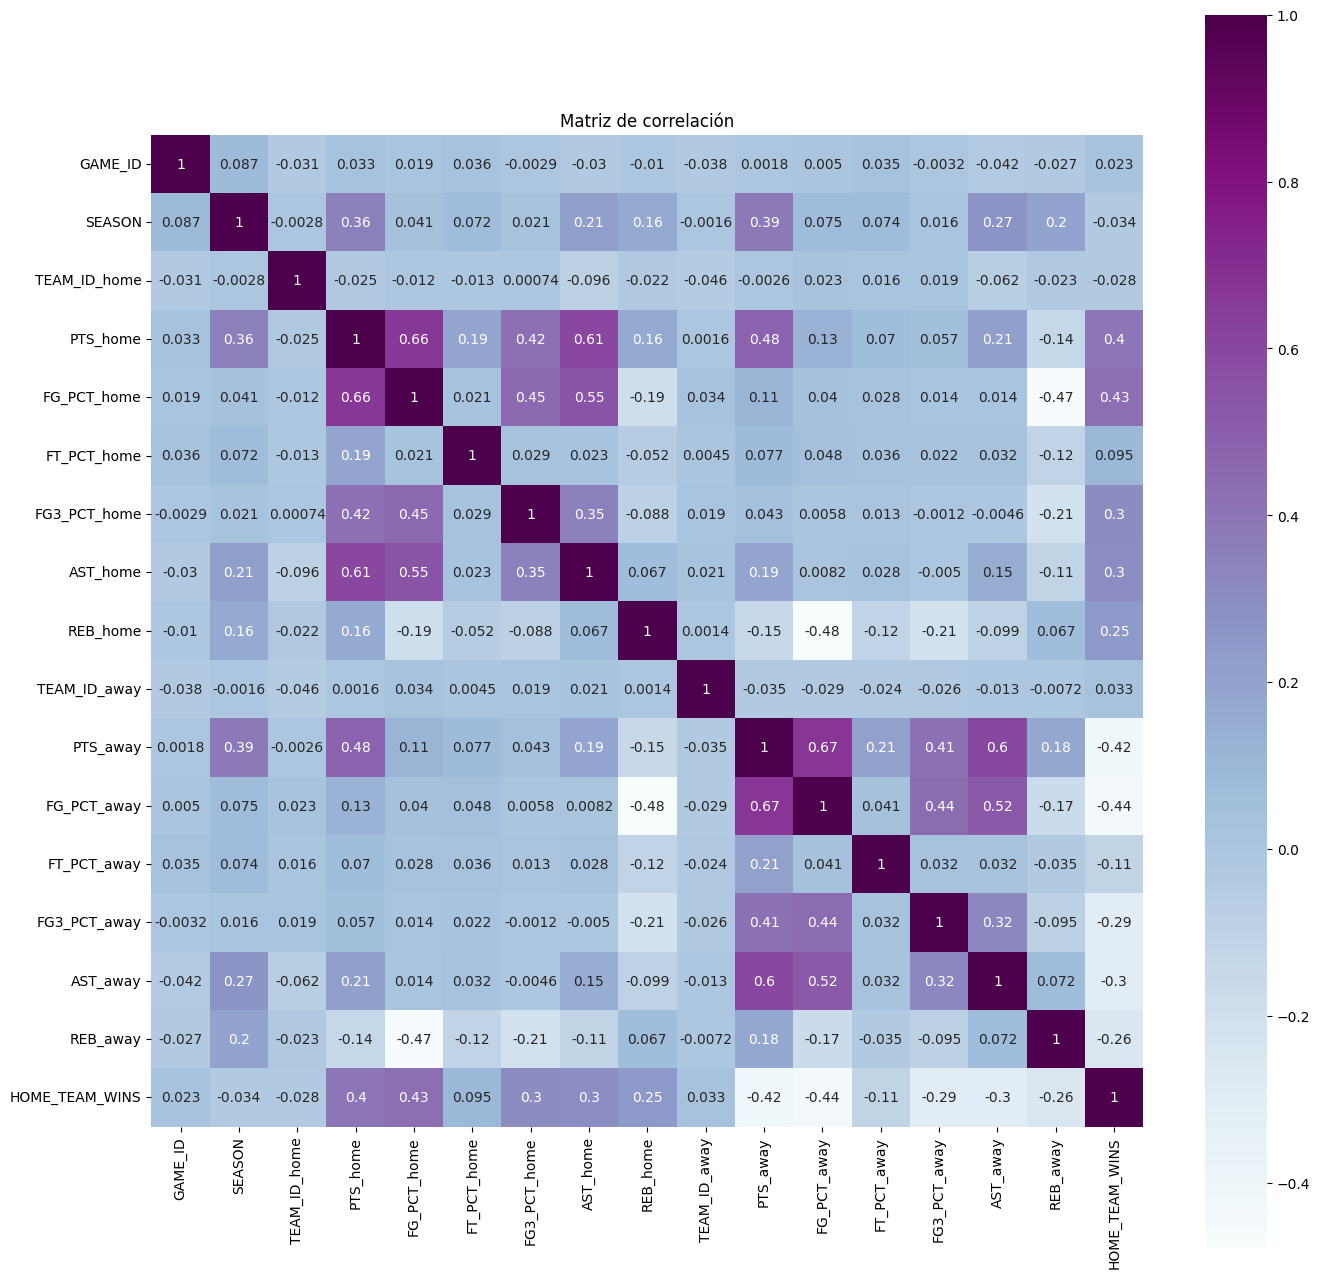

In [52]:
plt.figure(figsize=(16, 16))
plt.title('Matriz de correlación')
sns.heatmap(df_games.corr(), square=True, annot=True,cmap="BuPu")

Ver los equipos que mas han ganado en la historia

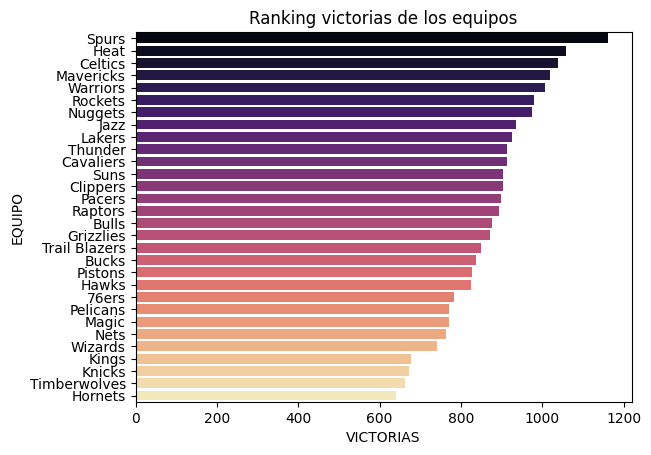

In [53]:
top_win = np.where(df_games['HOME_TEAM_WINS'] == 1, df_games['HOME_TEAM_ID'], df_games['VISITOR_TEAM_ID'])
top_win = pd.DataFrame(top_win, columns=['TEAM_ID'])
top_win = top_win.value_counts().to_frame().reset_index()
top_win.columns = ['EQUIPO', 'VICTORIAS']
tw = sns.barplot(data=top_win, x='VICTORIAS', y='EQUIPO', palette = 'magma').set(title='Ranking victorias de los equipos')